In [1]:
import pyfits as fits
from numpy import polyfit
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.optimize import curve_fit
class PLfit():
    def __init__(self, period, luminosity, lum_error):
        self.per = period
        self.lnp = log(period)
        self.lum = luminosity
        self.popt, self.pcov = curve_fit(self._f, self.per, self.lum, sigma = lum_error)
    def _f(self, x, a, b):
        return a + b * log(x)
    
    def __call__(self, x):
        return self._f(x, *self.popt)
    

In [201]:
from scipy.optimize import curve_fit
class PL_global_fit():
    def __init__(self, cephieds):
        self.fields = cephieds['Field']
        self.fieldnames = list(set(cephieds['Field']))
        self.mag = cephieds['mag']
        self.err = cephieds['e_mag']
        self.per = cephieds['Period']
        self.popt, self.pcov = curve_fit(self._f,zip(self.fields, self.per), self.mag, sigma = self.err)
        
    def _f(self, x, u0, u1, u2, u3, u4, u5, u6, u7, u8, slope, curve):
        return [self._DL(float(val), field, u0, u1, u2, u3, u4, u5, u6, u7, u8, slope, curve) for field, val in x]
        
    def _DL(self, val, field, u0, u1, u2, u3, u4, u5, u6, u7, u8, slope, curve):
            if field == self.fieldnames[0]:
                return self.__DL(val, u0, slope, curve)
            if field == self.fieldnames[1]:
                return self.__DL(val, u1, slope, curve)
            if field == self.fieldnames[2]:
                return self.__DL(val, u2, slope, curve)
            if field == self.fieldnames[3]:
                return self.__DL(val, u3, slope, curve)
            if field == self.fieldnames[4]:
                return self.__DL(val, u4, slope, curve)
            if field == self.fieldnames[5]:
                return self.__DL(val, u5, slope, curve)
            if field == self.fieldnames[6]:
                return self.__DL(val, u6, slope, curve)
            if field == self.fieldnames[7]:
                return self.__DL(val, u7, slope, curve)
            if field == self.fieldnames[8]:
                return self.__DL(val, u8, slope, curve)
    def __DL(self,val, mag, slope,curve):
        
        return mag + slope * np.log(val) + curve * 1/np.log(val)
    def __call__(self, period):
        return self._f(period, *self.popt)

In [202]:
field_types = None 
#['str', 'float', 'float','float','float',
#               'float','float','float','float','float',
#               'float','float','float']
cephieds = genfromtxt('cephieds.txt', 
               skip_header = 39, 
                invalid_raise=False,
                missing_values='',
                usemask=False,
                filling_values=0.0,
                dtype = field_types,
                names = True);



[ 29.65241653  -1.34502891]
[ 27.97111953  -1.21643858]
[ 30.28230124  -1.6061571 ]
[ 28.85099412  -1.23925939]
[ 28.13947567  -1.07549883]
[ 28.62538639  -1.21908743]
[ 26.70301098  -1.28757613]
[ 29.22686493  -1.22152873]
[ 28.51380324  -0.97419727]


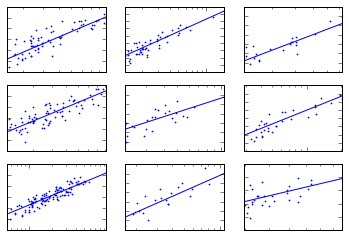

In [203]:
fields = set(cephieds['Field'])
for i, field in enumerate(fields):

    subplot(3,3,i+1)
    indices = array([i for i,cephied in enumerate(cephieds) if cephied['Field'] == field])
    per = cephieds['Period'][indices]
    mag = cephieds['mag'][indices]
    err = cephieds['e_mag'][indices]
    fit = PLfit(per, mag, err)
    print fit.popt
    scatter( per,mag, s= 3, linewidth = 0)
    xvals = linspace(min(per), max(per), 1000)
    yvals = fit(xvals)
    plot(xvals, yvals)
    gca().set_xscale('log')
    xlim(min(per), max(per))
    #title('%s'%field)
    #ylabel('magnitude')
    #xlabel('log period')
    #gca().xaxis.set_major_locator(MaxNLocator(nbins = 4))
    #gca().yaxis.set_major_locator(MaxNLocator(nbins = 4))
    gca().set_xticklabels([])
    gca().set_yticklabels([])
    gca().invert_yaxis()
#tight_layout()

In [204]:
fit = PL_global_fit(cephieds)

In [205]:
fit.popt


array([ 28.84876107,  27.66247176,  28.56307094,  28.46737839,
        28.36367679,  28.33031582,  26.1468758 ,  28.90102331,
        29.1873484 ,  -1.1938508 ,   0.79373058])

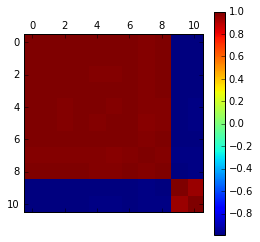

In [206]:
fit.corrmat = zeros(fit.pcov.shape)
for i in arange(fit.pcov.shape[0]):
    for j in arange(fit.pcov.shape[1]):
        fit.corrmat[i,j] = fit.pcov[i,j]/sqrt(fit.pcov[i,i]*fit.pcov[j,j])


matshow(fit.corrmat)
colorbar()

In [209]:
print sum((cephieds['mag'] - fit(zip(cephieds['Field'], cephieds['Period'])))**2/cephieds['e_mag']**2)/(len(cephieds['e_mag'])-11)

0.977732972746


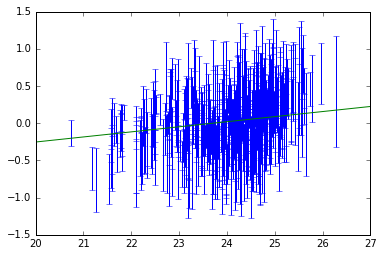

In [218]:
errorbar(cephieds['mag'],(cephieds['mag'] - fit(zip(cephieds['Field'], cephieds['Period']))), yerr = cephieds['e_mag'],
        linestyle = '')
slope, intercept = polyfit(cephieds['mag'], (cephieds['mag'] - fit(zip(cephieds['Field'], cephieds['Period']))), 1,w = 1/cephieds['e_mag'])
xvals = linspace(20,27,1000)
plot(xvals, intercept + slope * xvals )

array([ 0.06825823, -1.61817386])